# 0. Imports

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=76ec1068400177867557825377463cdbe4c70a3ba4c3da7f4fb7f0050d54b4c2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=2471c3928bb173b8e2b4ab296af488f08c61e56a925505609828f7

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541968 sha256=a42266c0596f81183e0c0f85e4da3ffd541ad3c734f74f1f91866f1992479e47
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha25

In [ ]:
from plotly.offline import init_notebook_mode
from bertopic import BERTopic
from bertopic import *
import nltk
# nltk.download()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from collections import Counter
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import requests
import string
import itertools
from time import sleep
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from plotly.offline import init_notebook_mode
from bertopic import BERTopic
from bertopic import *
from bertopic.representation import KeyBERTInspired
from bertopic.representation import ZeroShotClassification
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import community_detection, cos_sim
import random as rd
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# 1. Clustering to retrieve sexual sequences

Get the data

In [ ]:
f = open("gameofthrones.txt", "r",encoding='utf-8')
text_list = [line for line in f.readlines()]
delta = 5
text = ' '.join(text_list)

In [ ]:
# Define a list of words in the lexical field of sex
sex_lexicon = ['sex', 'sexual', 'intimacy', 'passion', 'romance', 'affair', 'liaison', 'fling', 'tryst', 'encounter', 'activity', 'connection', 'episode', 'intercourse', 'coitus', 'lust', 'desire', 'pleasure', 'sensual', 'erotic', 'seduction', 'seductive', 'seduce', 'seducer', 'seductress', 'arousal', 'orgasm', 'foreplay', 'kiss', 'naked', 'nudity', 'pornography', 'prostitute', 'whore', 'brothel', 'virginity', 'impotence', 'erection', 'masturbation', 'ejaculation', 'contraception', 'abortion', 'homosexuality', 'bisexuality', 'transgender', 'queer', 'pansexual', 'pansexuality']
synonyms = ['rape', 'romance', 'passion', 'lust', 'affair', 'liaison', 'kiss', 'fuck', 'fucked', 'intercourse', 'coitus', 'breast', 'penis', 'masturbation', 'nipples', 'whore']
sex_lexicon.extend(synonyms)
f = open("gameofthrones.txt", "r",encoding='utf-8')
text = [line.replace("\n","") for line in f.readlines()]
text_Sexual = []
delta = 0
for i in range(len(text)):
    if any(x in text[i] for x in sex_lexicon) or any(x in text[i] for x in sex_lexicon):
        # text_Sexual.append(".".join(text[i-delta : i+delta]))
        text_Sexual.append(text[i])

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(text_Sexual)

In [ ]:
clusters = community_detection(torch.tensor(embeddings), threshold=0.5)
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", text_Sexual[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", text_Sexual[sentence_id])


Cluster 1, #486 Elements 
	 “One day, Bran, you will be Robb’s bannerman, holding a keep of your own for your brother and your king, and justice will fall to you. When that day comes, you must take no pleasure in the task, but neither must you look away. A ruler who hides behind paid executioners soon forgets what death is.”
	 Her brother hung the gown beside the door. “Illyrio will send the slaves to bathe you. Be sure you wash off the stink of the stables. Khal Drogo has a thousand horses, tonight he looks for a different sort of mount.” He studied her critically. “You still slouch. Straighten yourself” He pushed back her shoulders with his hands. “Let them see that you have a woman’s shape now.” His fingers brushed lightly over her budding breasts and tightened on a nipple. “You will not fail me tonight. If you do, it will go hard for you. You don’t want to wake the dragon, do you?” His fingers twisted her, the pinch cruelly hard through the rough fabric of her tunic. “Do you?” he 

In [ ]:
text_aggregation = []
id1 = id2 = 0
for i in range(len(text)):
    if i < id2-1:
      continue
    sentence = text[i]
    id1 = id2 = i
    while len(sentence) < 75:
        id1 -= 1
        id2 += 1
        if id2 >= len(text):
            break
        if id1 < 0:
            break
        trsent1 = text[id1]
        trsent2 = text[id2]
        sentence = "".join([trsent1, sentence, trsent2])
    text_aggregation.append(sentence)
print(len(text_aggregation))
bookEmbeding = model.encode(text_aggregation)

51022


KeyboardInterrupt: ignored

In [ ]:
cluster_descriptions = {
    8: "Intimate moments",
    10: "Brothels and desire",
    15: "Cunning remarks",
    21: "Disturbing coercion",
    23: "Traditions and sex",
    27: "Suggestive tension"
}

In [ ]:
sexualCluster = [8, 10, 15, 21, 23, 27]
# now let make a classification model
df = pd.DataFrame(columns=['text', 'cluster', "similarity"])
total = 0
for j in tqdm(range(len(bookEmbeding))):
    maxcluster = -1
    maxsimilarity = -1 
    for i, cluster in enumerate(clusters):
        similarity = cos_sim(embeddings[cluster], bookEmbeding[j])
        if (similarity.mean() > maxsimilarity):
            maxsimilarity = similarity.mean()
            maxcluster = i
    if (maxcluster+1)  in sexualCluster:
        df = pd.concat([df, pd.DataFrame([[text_aggregation[j], cluster_descriptions[maxcluster+1], maxsimilarity.item()]], columns=['text', 'cluster', "similarity"])],  ignore_index=True)
df.head()

In [ ]:
df = df[df.similarity > .35]
df.reset_index(inplace = True)

In [ ]:
text_Sexual = df['text'].values
tt = []
for i in range(len(text_Sexual)):
  tt.append(str(text_Sexual[i]))
for i in range(len(df)//20):
  tt.append(text_aggregation[rd.randint(0, len(text_aggregation)-1)])

In [ ]:
representation_model = KeyBERTInspired()
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(representation_model=representation_model, vectorizer_model=vectorizer_model)
topics = topic_model.fit_transform(tt)

In [ ]:
fig = topic_model.visualize_barchart(top_n_topics=100)
fig.write_html("model.html")
fig = topic_model.visualize_topics()
fig.write_html("model2.html")

In [ ]:
t, s =topic_model.find_topics(["kiss", "sex"], top_n=5)
t, s

([1, 13, 17, -1, 38],
 [0.68754077, 0.50123835, 0.49806464, 0.49354994, 0.4899859])

In [ ]:
# dftr = topic_model.get_document_info(tt)
dftr[(dftr.Probability >= 1) & (dftr.Topic == 1)]

,Document,Topic,Name,Top_n_words,Probability,Representative_document
11,Her brother held the gown up for her inspectio...,1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
72,It seemed as if hours passed before his hands ...,1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
73,"He stopped then, and drew her down onto his la...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
74,"He stopped then, and drew her down onto his la...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
75,"He stopped then, and drew her down onto his la...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
...,...,...,...,...,...,...
1428,"“I cannot eat a silver stag, nor ride one. A s...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
1429,"“Aye,” Lem complained. “Too old for wine and k...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
1430,"“Aye,” Lem complained. “Too old for wine and k...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False
1464,"“I would not,” she insisted. “There is no one ...",1,1_whispered_ygritte_kissed_vows,whispered - ygritte - kissed - vows - kiss - l...,1.0,False


# 3. NER

### Scraping

In order to normalize our results, we need the true values of the names. We use a scraping method to get them.

In [ ]:
# Make a request to the webpage

urls = 'https://iceandfire.fandom.com/wiki/Category:Characters?from='
alphabet = list(string.ascii_uppercase)

soups = []
characters = []

for i in range(26):
  url = urls+(alphabet[i])
  req = urllib.request.Request(url)
  with urllib.request.urlopen(req) as response:
      html = response.read()

  soup = BeautifulSoup(html, 'html.parser')
  soups.append(soup)

characters = []

for i in range(26):
  links = soups[i].find_all('a', {'class': 'category-page__member-link'})

  for link in links:
      name = link.get_text().strip()
      if name != '':
          characters.append(name)

  # Print the list of character names
print(characters)

['Addam Marbrand', 'Addison Hill', 'Adrack Humble', 'Adrian Tarbeck', 'Aegon Blackfyre', 'Aegon Frey', 'Aegon Frey (son of Aenys)', 'Aegon I Targaryen', 'Aegon II Targaryen', 'Aegon III Targaryen', 'Aegon IV Targaryen', 'Aegon Targaryen (Son of Aenys I)', 'Aegon Targaryen (son of Aerys II)', 'Aegon Targaryen (Son of Baelon)', 'Aegon Targaryen (son of Gaemon)', 'Aegon Targaryen (son of Jaehaerys I)', 'Aegon Targaryen (son of Rhaegar)', 'Aegor Rivers', 'Aelyx Targaryen', 'Aemma Arryn', 'Aemon (wildling)', 'Aemon Blackfyre', 'Aemon Targaryen (Son of Jaehaerys I)', 'Aemon Targaryen (Son of Maekar I)', 'Aemond Targaryen', 'Aenar Targaryen', 'Aenys Frey', 'Aerea Targaryen', 'Aerion Targaryen', 'Aerion Targaryen (son of Daemion)', 'Aeron Greyjoy', 'Aeryn Targaryen', 'Aerys Targaryen (son of Aegon)', 'Aethan Velaryon', 'Aethelmure', 'Aggo', 'Agnes Blackwood', 'Aladale Wynch', 'Aladore Florent', 'Alan Beesbury', "Alan o' the Oak", 'Alan Tarly', 'Alannys Harlaw', 'Alaric Stark', 'Alarra Massey',

### Get the correct df (comes from the operations above)

In [ ]:
df = pd.read_csv('good.csv')

In [ ]:
df['Characters_nltk'] = ''
df['Places_nltk'] = ''
df['Characters_bert'] = ''
df['Places_bert'] = ''

## 3.1 NER with NLTK

In [ ]:
def nltk_ner(sentence):
  nltk_results = ne_chunk(pos_tag(word_tokenize(sentence)))

  person = []
  organization = []
  gpe = []
  facility = []
  gsp = []
  location = []

  for nltk_result in nltk_results:
      if type(nltk_result) == Tree:
          name = ''
          for nltk_result_leaf in nltk_result.leaves():
              name += nltk_result_leaf[0] + ' '
              match nltk_result.label():
                case 'PERSON':
                    person.append(name)
                case 'ORGANIZATION':
                    organization.append(name)
                case 'GPE':
                    gpe.append(name)
                case 'GSP':
                    gsp.append(name)
                case 'LOCATION':
                    location.append(name)
                case 'FACILITY':
                  facility.append(name)
        # print ('Type: ', nltk_result.label(), 'Name: ', name)
  return person, location

In [ ]:
# Apply ner to each row

for index in tqdm(range(len(df))):
  pers, loc = nltk_ner(df.loc[index, 'text'])
  df.loc[index, 'Characters_nltk'] = str(pers)
  df.loc[index, 'Places_nltk'] = str(loc)

100%|██████████| 95/95 [00:06<00:00, 14.37it/s]


In [ ]:
df

,text,cluster,similarity,place,Characters_nltk,Places_nltk,Characters_bert,Places_bert
0,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,286,"['Illyrio ', 'Khal ', 'Khal Drogo ']",[],,
1,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,289,"['Illyrio ', 'Khal ', 'Khal Drogo ', 'Dany ', ...",[],,
2,"And for the first time in hours, she forgot to...",Intimate moments,1.0,1078,"['Dany ', 'Dothraki ', 'Daenerys ']",[],,
3,It took a long time. All the while he sat ther...,Intimate moments,1.0,1103,"['Dany ', 'Drogo ']",[],,
4,After a while he began to touch her. Lightly a...,Intimate moments,1.0,1109,['Dany '],[],,
...,...,...,...,...,...,...,...,...
90,"“You know nothing, Jon Snow,” Ygritte would ha...",Intimate moments,1.0,28384,"['Jon ', 'Jon Snow ', 'Ygritte ', 'Jon ']",[],,
91,“Good.” Sandor’s voice was thick with pain. “I...,Intimate moments,1.0,28577,"['Sandor ', 'Harrenhal ', 'Lady ', 'Lady Lysa ...",[],,
92,I need silver. The realization made her bite h...,Traditions and sex,1.0,28629,"['Sandor ', 'Craven ']",[],,
93,"“All you have to give, Jon Snow. He is a king....",Intimate moments,1.0,28771,"['Jon ', 'Jon Snow ', 'Mikken ', 'Ygritte ', '...",[],,


### Normalization

In [ ]:

vectorizer = TfidfVectorizer(tokenizer=lambda x: list(x), lowercase=False)
def similarity(one, two):

  # Create a corpus of the two words
  corpus = [one, two]

  # Create a TfidfVectorizer with a custom tokenizer that returns the input as a list of characters

  # Compute the soft TF-IDF weights
  tfidf = vectorizer.fit_transform(corpus)

  # Compute the cosine similarity between the two words
  similarity = cosine_similarity(tfidf[0], tfidf[1])[0][0]

  return(similarity)

In [ ]:
df.Characters_nltk = df.Characters_nltk.apply(lambda x: eval(x))
df.Places_nltk = df.Places_nltk.apply(lambda x: eval(x))

In [ ]:
# Loop through rows to nomalize each list
dicoPerso = dicoPerso = {
    "dany": "Daenerys Targaryen",
    "daenerys": "Daenerys Targaryen",
    "jon snow": "Jon Snow",
    "jon": "Jon Snow",
    "tyrion": "Tyrion Lannister",
    "bran": "Bran Stark",
    "khal drogo": "Drogo",
    "khal" : "Drogo",
    "ned": "Eddard Stark",
    "viserys": "Viserys Targaryen",
    "loras" : "Loras Tyrell",
    "ser jorah": "Jorah Mormont",
    "sam": "Samwell Tarly",
    "robert" : "Robert I Baratheon"
}

for index in tqdm(range(len(df))):
  persons = df.loc[index, "Characters_nltk"]
  unique_chars = set()
  for i in range(len(persons)):
      char1 = persons[i]
      if char1[0] == " ":
        char1 = char1[1:]
      if char1[-1] == " ":
        char1 = char1[:-1]
      if (char1.lower() in dicoPerso):
          unique_chars.add(dicoPerso[char1.lower()])
          continue
      elif (char1 in characters):
          unique_chars.add(char1)
          dicoPerso[char1.lower()] = char1
          continue
      v = []
      for j in range(len(characters)):
          char2 = characters[j]
          distance = similarity(char1, char2)
          v.append(distance)
      if max(v) < .7:
        dicoPerso[char1.lower()] = "tr"
        continue
      unique_chars.add(characters[v.index(max(v))])
      dicoPerso[char1.lower()] = characters[v.index(max(v))]
  if "tr" in unique_chars:
    unique_chars.remove("tr")
  df.loc[index, "Characters_nltk"] = str(list(unique_chars))

100%|██████████| 95/95 [08:27<00:00,  5.34s/it]


In [ ]:
type(df.Characters_nltk.values[0])

str

In [ ]:
df.Characters_nltk = df.Characters_nltk.apply(lambda x: eval(x))
df

,text,cluster,similarity,place,Characters_nltk,Places_nltk,Characters_bert,Places_bert
0,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,286,"[Illyrio Mopatis, Drogo]",[],,
1,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,289,"[Daenerys Targaryen, Illyrio Mopatis, Drogo]",[],,
2,"And for the first time in hours, she forgot to...",Intimate moments,1.0,1078,[Daenerys Targaryen],[],,
3,It took a long time. All the while he sat ther...,Intimate moments,1.0,1103,"[Daenerys Targaryen, Drogo]",[],,
4,After a while he began to touch her. Lightly a...,Intimate moments,1.0,1109,[Daenerys Targaryen],[],,
...,...,...,...,...,...,...,...,...
90,"“You know nothing, Jon Snow,” Ygritte would ha...",Intimate moments,1.0,28384,"[Ygritte, Jon Snow]",[],,
91,“Good.” Sandor’s voice was thick with pain. “I...,Intimate moments,1.0,28577,"[Robert I Baratheon, Cregan Stark, Harlan Hoar...",[],,
92,I need silver. The realization made her bite h...,Traditions and sex,1.0,28629,[Brandon Stark],[],,
93,"“All you have to give, Jon Snow. He is a king....",Intimate moments,1.0,28771,"[Ygritte, Jon Snow, Mikken]",[],,


## 3.2 NER with BERT

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pre-trained model and the tokenizer
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-ner-english")
bert_ner = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/roberta-large-ner-english").to(device)

# Create a NER pipeline consisting of the model and its tokenizer
ner_model = pipeline('ner', model=bert_ner, tokenizer=tokenizer, aggregation_strategy="simple", device=device)

for index in tqdm(range(len(df))):
    # Extract sentences from the book
    sentences = df.loc[index, 'text']
    bert_tags = []
    # Parse sentences one by one
    result = ner_model(sentences)
    for entity in result:
      # Collect words and tags
      bert_tags.append((entity['word'], entity['entity_group']))
    # Create lists of names to add to the df
    bert_persons = []
    bert_places = []
  
    for word, tag in bert_tags:
        if tag == 'PER':
            bert_persons.append(word)
        elif tag == 'LOC':
            bert_places.append(word)
  
    df.loc[index, 'Characters_bert'] = str(bert_persons)
    df.loc[index, 'Places_bert'] = str(bert_places)

100%|██████████| 95/95 [00:05<00:00, 16.69it/s]


In [ ]:
df.Characters_bert = df.Characters_bert.apply(lambda x: eval(x))
df.Places_bert = df.Places_bert.apply(lambda x: eval(x))

In [ ]:
type(df.Characters_bert.values[0])

list

In [ ]:
for index in tqdm(range(len(df))):
  persons = df.loc[index, "Characters_bert"]
  unique_chars = set()
  for i in range(len(persons)):
      char1 = persons[i]
      if char1[0] == " ":
        char1 = char1[1:]
      if char1[-1] == " ":
        char1 = char1[:-1]
      if (char1.lower() in dicoPerso):
          unique_chars.add(dicoPerso[char1.lower()])
          continue
      elif (char1 in characters):
          unique_chars.add(char1)
          dicoPerso[char1.lower()] = char1
          continue
      v = []
      for j in range(len(characters)):
          char2 = characters[j]
          distance = similarity(char1, char2)
          v.append(distance)
      if max(v) < .7:
        dicoPerso[char1.lower()] = "tr"
        continue
      unique_chars.add(characters[v.index(max(v))])
      dicoPerso[char1.lower()] = characters[v.index(max(v))]
  if "tr" in unique_chars:
    unique_chars.remove("tr")
  df.loc[index, "Characters_bert"] = str(list(unique_chars))

100%|██████████| 95/95 [04:02<00:00,  2.56s/it]


In [ ]:
# df.Characters_bert = df.Characters_bert.apply(lambda x: eval(x))
df.to_csv("final.csv", index = False)

# 5. Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
final = pd.read_csv('final.csv')

In [ ]:
final.head()

,text,cluster,similarity,place,Characters_nltk,Places_nltk,Characters_bert,Places_bert
0,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,286,"['Illyrio Mopatis', 'Drogo']",[],"['Illyrio Mopatis', 'Drogo']",[]
1,Her brother hung the gown beside the door. “Il...,Intimate moments,1.0,289,"['Daenerys Targaryen', 'Illyrio Mopatis', 'Dro...",[],"['Daenerys Targaryen', 'Illyrio Mopatis', 'Dro...",[' Pentos']
2,"And for the first time in hours, she forgot to...",Intimate moments,1.0,1078,['Daenerys Targaryen'],[],['Daenerys Targaryen'],[]
3,It took a long time. All the while he sat ther...,Intimate moments,1.0,1103,"['Daenerys Targaryen', 'Drogo']",[],"['Daenerys Targaryen', 'Drogo']",[]
4,After a while he began to touch her. Lightly a...,Intimate moments,1.0,1109,['Daenerys Targaryen'],[],"['Daenerys Targaryen, Drogo']",[]


Distribution of clustering

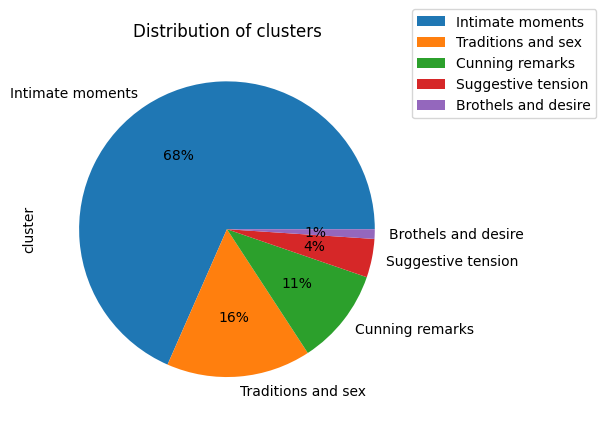

In [ ]:
final.cluster.value_counts(normalize = True).plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(loc = (1, 0.8))
plt.title("Distribution of clusters");

#### NLTK 
(do the same for bert column afterwards)

Who sex the most

Because of the type of the data, we must first change the strings to list in order to work with it


In [ ]:
final.Characters_nltk = final.Characters_nltk.apply(lambda x: eval(x))
final.Places_nltk = final.Places_nltk.apply(lambda x: eval(x))
final.Characters_bert = final.Characters_bert.apply(lambda x: eval(x))
final.Places_bert = final.Places_bert.apply(lambda x: eval(x))

In [ ]:
# final.Characters_nltk = final.Characters_nltk.apply(lambda x: list(x))
nltk_df = final.copy()
nltk_df = nltk_df.explode('Characters_nltk')
x = nltk_df.Characters_nltk.value_counts()
x = x.to_frame()
x = x[x.Characters_nltk>=3]

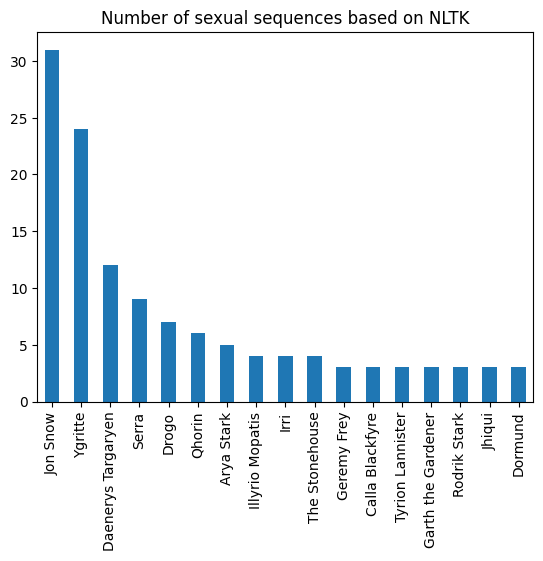

In [ ]:
x.Characters_nltk.plot(kind = 'bar', title = 'Number of sexual sequences based on NLTK');

Who is the character with the most different partners?

In [ ]:
data = final.Characters_nltk.values
character_dict = {}

for item in data:
  if item != []:
    characters = item.copy()
    main_character = characters.pop(0)  # Remove the first character from the list
    if main_character not in character_dict:
        character_dict[main_character] = []
    character_dict[main_character].extend(characters)
# Remove duplicates from dictionary values
for key in character_dict:
    character_dict[key] = len(list(set(character_dict[key])))
print(character_dict)

{'Illyrio Mopatis': 1, 'Daenerys Targaryen': 8, 'Lyarra Stark': 0, 'Arya Stark': 0, 'Jhiqui': 1, 'Irri': 7, 'Alliser Thorne': 6, 'Rodrik Stark': 2, 'Pycelle': 3, 'Bran Stark': 1, 'Urron Greyiron': 0, 'Patchface': 2, 'Stafford Lannister': 0, 'Theon Greyjoy': 1, 'Hareth': 0, 'Barbara Bracken': 2, 'Edwell Celtigar': 3, 'Hallyne': 2, 'Sigorn': 5, 'Todric': 1, 'Torgon Greyiron': 1, 'Ygritte': 15, 'Tyrion Lannister': 1, 'Horton Redfort': 1, 'Aggo': 3, 'Jon Snow': 4, 'Lonnel Snow': 1, 'Raymun Redbeard': 5, 'Serra': 1, 'Rast': 2, 'Sansa Stark': 0, 'Clarent Crakehall': 2, 'Grenn': 2, 'Will': 0, 'All-for-Joffrey': 4, 'Salladhor Saan': 0, 'Harrold Langward': 0, 'Balon Botley': 1, 'Quaithe': 2, 'Weeper': 0, 'Joseran': 7, 'Geremy Frey': 1, 'Robert Strong': 4, 'Dormund': 2, 'Robert I Baratheon': 4, 'Brandon Stark': 0}


In [ ]:
[character_dict.pop(key) for key in ['Arya Stark', 'Harrold Langward', 'Brandon Stark', 'Hareth', 'Lyarra Stark', 'Salladhor Saan', 'Sansa Stark', 'Stafford Lannister', 'Urron Greyiron', 'Will', 'Weeper']]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

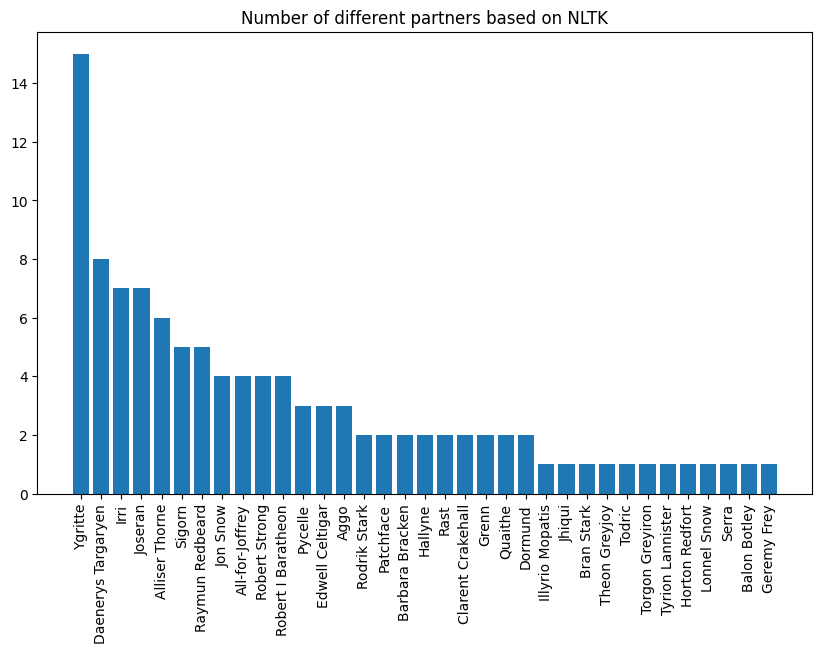

In [ ]:
# plot the value of each key as the number of partens
lists = sorted(character_dict.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists)

plt.figure(figsize=(10,6))
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.title('Number of different partners based on NLTK')
plt.show()

#### BERT

In [ ]:
# final.Characters_nltk = final.Characters_nltk.apply(lambda x: list(x))
bert_df = final.copy()
bert_df = nltk_df.explode('Characters_bert')
x = bert_df.Characters_bert.value_counts()
x = x.to_frame()
x = x[x.Characters_bert>=7]

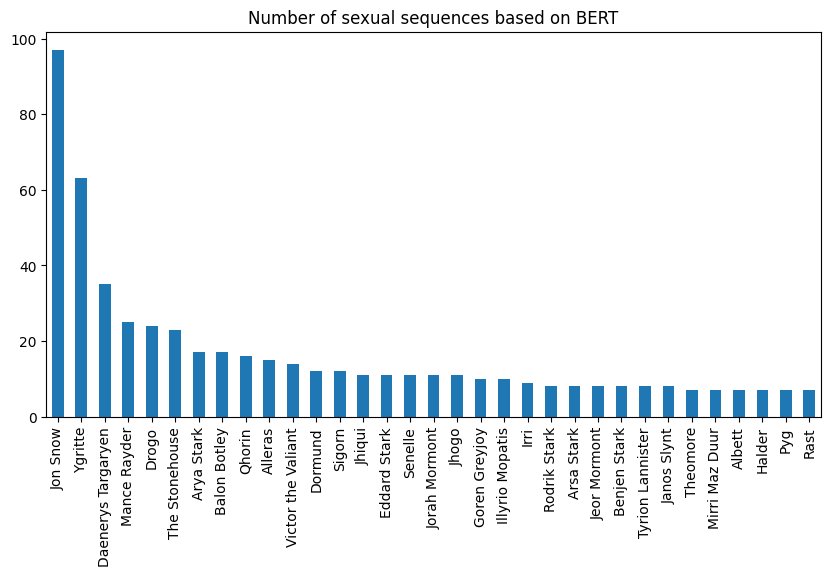

In [ ]:
x.Characters_bert.plot(kind = 'bar', figsize = (10, 5), title = 'Number of sexual sequences based on BERT');

In [ ]:
data = final.Characters_bert.values
character_dict = {}

for item in data:
  if item != []:
    characters = item.copy()
    main_character = characters.pop(0)  # Remove the first character from the list
    if main_character not in character_dict:
        character_dict[main_character] = []
    character_dict[main_character].extend(characters)
# Remove duplicates from dictionary values
for key in character_dict:
    character_dict[key] = len(list(set(character_dict[key])))
print(character_dict)

{'Illyrio Mopatis': 1, 'Daenerys Targaryen': 6, 'Daenerys Targaryen, Drogo': 0, 'Pycelle': 1, 'Arya Stark': 1, 'Jhiqui': 1, 'Irri': 2, 'Pyg': 6, 'Raynald Westerling': 7, 'Eddard Stark': 2, 'Stiv': 3, 'Jhogo': 6, 'Goren Greyjoy': 4, 'Patchface': 2, 'Melisandre': 2, 'The Stonehouse': 0, 'Theon Greyjoy': 1, 'Rodrik Stark': 3, 'Jon Connington': 3, 'Sigorn': 4, 'Balon Botley': 4, 'Ygritte': 17, 'Shae': 2, 'Jon Snow': 3, 'Cyrenna Swann': 1, 'Mance Rayder': 9, 'Cleyton Caswell': 1, 'Anguy': 1, 'Sansa Stark': 0, 'Clarent Crakehall': 3, 'Grenn': 2, 'All-for-Joffrey': 4, 'Salladhor Saan': 0, 'Rhogoro': 0, 'Tom of Sevenstreams': 0, 'Qyburn': 2, 'Robert Strong': 2, 'Dormund': 1, 'Gregor Goode': 5, 'Polliver': 3}


In [ ]:
[character_dict.pop(key) for key in ['Daenerys Targaryen, Drogo', 'Sansa Stark', 'Salladhor Saan', 'The Stonehouse', 'Rhogoro', 'Tom of Sevenstreams']]

[0, 0, 0, 0, 0, 0]

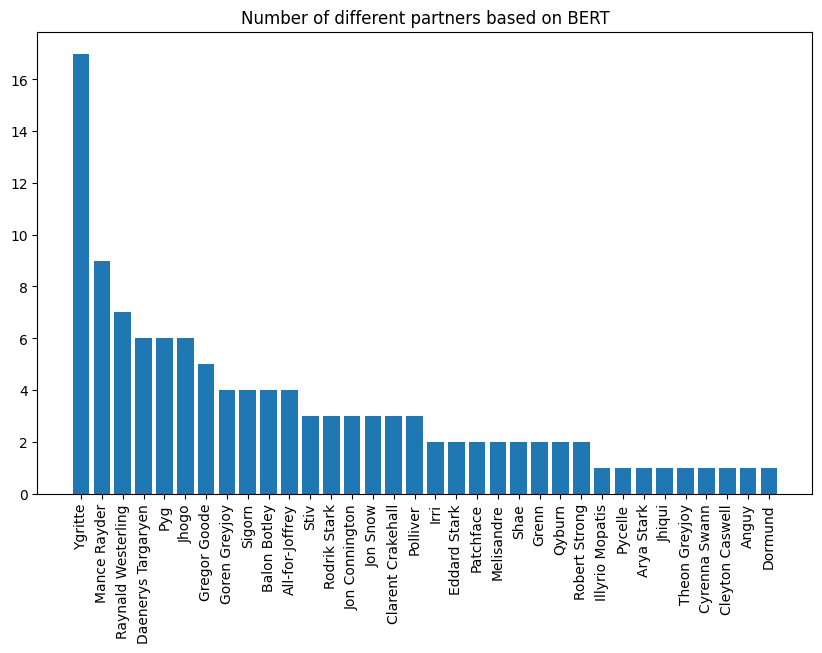

In [ ]:
# plot the value of each key as the number of partens
lists = sorted(character_dict.items(), key=lambda x:x[1], reverse = True)
x, y = zip(*lists)

plt.figure(figsize=(10,6))
plt.bar(x, y)
plt.title('Number of different partners based on BERT')
plt.xticks(rotation = 90)
plt.show()

#### Bert topic

In [ ]:
# See model.html

# Experciences

In [ ]:
# Imports
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
# List of sentences to evaluate
sentences = [
    "Jon Snow joined the Night's Watch at Castle Black.",
    "Daenerys Targaryen hatched three dragon eggs.",
    "Arya Stark trained with the Faceless Men in Braavos.",
    "Ned Stark served as the Hand of the King in King's Landing.",
    "Tyrion Lannister is known for his wit and intelligence.",
    "Sansa Stark was betrothed to Joffrey Baratheon.",
    "Cersei Lannister plotted against her enemies in the Red Keep.",
    "The Starks and the Lannisters were involved in a bitter feud.",
    "The White Walkers threatened the realm beyond the Wall.",
    "The Dothraki horde followed Khal Drogo.",
    "The Iron Throne is the ultimate symbol of power in Westeros.",
    "Bran Stark fell from a tower and became paralyzed.",
    "Catelyn Stark fought for her family's honor.",
    "Jaime Lannister is known as the Kingslayer.",
    "The Red Wedding was a tragic event in the series.",
    "The Night King commanded an army of the undead.",
    "Melisandre is a priestess of the Lord of Light.",
    "The Battle of Blackwater Bay was a turning point in the war.",
    "The direwolves are the sigil of House Stark.",
    "The Unsullied are trained as elite soldiers.",
    "The Brotherhood Without Banners fought for justice.",
    "Ygritte was a wildling and Jon Snow's love interest.",
    "The Citadel in Oldtown is where maesters are trained.",
    "Samwell Tarly is a loyal friend of Jon Snow.",
    "Valar Morghulis, meaning 'All men must die.'"
]

In [ ]:
# List of the true NER tags for those sentences
true_values = [
    [('Jon Snow', 'PERSON'), ('Night\'s Watch', 'ORGANIZATION'), ('Castle Black', 'GPE')],
    [('Daenerys Targaryen', 'PERSON')],
    [('Arya Stark', 'PERSON'), ('Faceless Men', 'ORGANIZATION'), ('Braavos', 'GPE')],
    [('Ned Stark', 'PERSON'), ('Hand', 'PERSON'), ('King \'s Landing', 'GPE')],
    [('Tyrion Lannister', 'PERSON')],
    [('Sansa Stark', 'PERSON'), ('Joffrey Baratheon', 'PERSON')],
    [('Cersei Lannister', 'PERSON'), ('Red Keep', 'GPE')],
    [('Starks', 'ORGANIZATION'), ('Lannisters', 'ORGANIZATION')],
    [('White Walkers', 'ORGANIZATION'), ('Wall', 'GPE')],
    [('Dothraki', 'ORGANIZATION'), ('Khal Drogo', 'PERSON')],
    [('Iron Throne', 'GPE'), ('Westeros', 'GPE')],
    [('Bran Stark', 'PERSON')],
    [('Catelyn Stark', 'PERSON')],
    [('Jaime Lannister', 'PERSON'), ('Kingslayer', 'PERSON')],
    [('Red Wedding', 'O')],
    [('Night King', 'PERSON')],
    [('Melisandre', 'PERSON'), ('Lord Light', 'PERSON')],
    [('Battle', 'ORGANIZATION'), ('Blackwater Bay', 'GPE')],
    [('direwolves', 'ORGANIZATION'), ('House Stark', 'ORGANIZATION')],
    [('Unsullied', 'ORGANIZATION')],
    [('Brotherhoodw without Banners', 'ORGANIZATION')],
    [('Ygritte', 'PERSON'), ('Jon Snow', 'PERSON')],
    [('Citadel', 'GPE'), ('Oldtown', 'GPE')],
    [('Samwell Tarly', 'PERSON'), ('Jon Snow', 'PERSON')],
    [('Valar Morghulis', 'ORGANIZATION')],
]

NLTK NER

In [ ]:
# Perform NER on the test sentences
ner_results = []

for sentence in sentences:
    ner_result = []

    nltk_results = ne_chunk(pos_tag(word_tokenize(sentence)))
    for subtree in nltk_results:
        if isinstance(subtree, Tree):
          ner_label = subtree.label()
          ner_words = [(word, ner_label) for word, _ in subtree.leaves()]
          ner_result.extend(ner_words)
    ner_results.append(ner_result)

# Flatten the nested lists to create flat lists of predicted and true tags
predicted_tags = [tag for sentence in ner_results for tag in sentence]
true_tags = [tag for sentence in true_values for tag in sentence]


In order to get the results in the same format as the true values, we will concatenate different tokens together so it matches the output. If there is a conflict between the two values needed to be merged, both value will be tried. At the end, we will return the averaged metrics for all the combinations that we tried.

In [ ]:
formatted_predicted_tags = [('Jon Snow', 'PERSON'),
 ('Night Watch', 'PERSON'), # OR GPE
 ('Castle Black', 'ORGANIZATION'),
 ('Daenerys Targaryen', 'PERSON'),
 ('Arya Stark', 'PERSON'),
 ('Faceless Men', 'ORGANIZATION'),
 ('Braavos', 'GPE'),
 ('Ned Stark', 'PERSON'),
 ('Hand', 'ORGANIZATION'),
 ('King\'s Landing', 'GPE'),
 ('Tyrion Lannister', 'PERSON'),
 ('Sansa Stark', 'PERSON'),
 ('Joffrey Baratheon', 'PERSON'),
 ('Cersei Lannister', 'PERSON'),
 ('Red Keep', 'ORGANIZATION'),
 ('Starks', 'ORGANIZATION'),
 ('Lannisters', 'ORGANIZATION'),
 ('White Walkers', 'FACILITY'),
 ('Wall', 'ORGANIZATION'),
 ('Dothraki', 'ORGANIZATION'),
 ('Khal Drogo', 'PERSON'),
 ('Iron Throne', 'ORGANIZATION'),
 ('Westeros', 'GPE'),
 ('Bran Stark', 'PERSON'),
 ('Catelyn Stark', 'GPE'),
 ('Jaime Lannister', 'PERSON'),
 ('Kingslayer', 'ORGANIZATION'),
 ('Red Wedding', 'ORGANIZATION'),
 ('Night King', 'ORGANIZATION'),
 ('Melisandre', 'GPE'),
 ('Lord Light', 'GPE'), #Organization or gpe
 ('Battle', 'ORGANIZATION'),
 ('Blackwater Bay', 'ORGANIZATION'),
 ('missing', 'O'),
 ('House Stark', 'ORGANIZATION'),
 ('missing', 'O'),
 ('Brotherhood Without Banners', 'ORGANIZATION'),
 ('Ygritte', 'PERSON'),
 ('Jon Snow', 'PERSON'),
 ('Citadel', 'ORGANIZATION'),
 ('Oldtown', 'GPE'),
 ('Samwell Tarly', 'ORGANIZATION'), #Person or orga
 ('Jon Snow', 'PERSON'),
 ('Valar Morghulis', 'PERSON')]

In [ ]:
# Convert the true values and predicted values into flat lists
true_values_flat = []
predicted_flat = []
for i in range(len(true_tags)):
  true_values_flat.append(true_tags[i][1])
  predicted_flat.append(formatted_predicted_tags[i][1])

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_values_flat, predicted_flat, average='weighted')
recall = recall_score(true_values_flat, predicted_flat, average='weighted')
f1 = f1_score(true_values_flat, predicted_flat, average='weighted')
accuracy = accuracy_score(true_values_flat, predicted_flat)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))
print("Accuracy-score: {:.4f}".format(accuracy))


Precision: 0.6535
Recall: 0.5682
F1-score: 0.5954
Accuracy-score: 0.5682


In [ ]:
import numpy as np

precisions = [0.6788, 0.6904, 0.6997, 0.7086, 0.6900, 0.6788]
recalls = [0.5909, 0.5909, 0.5909, 0.6136, 0.6136, 0.5909]
f = [0.6206, 0.6247, 0.6259, 0.6464, 0.6206]
acc = [0.5909, 0.5909, 0.5909, 0.6136, 0.6136, 0.5909]

# Print the metrics
print("Precision mean: {:.4f}".format(np.mean(precisions)))
print("Recall mean: {:.4f}".format(np.mean(recalls)))
print("F1-score mean: {:.4f}".format(np.mean(f)))
print("Accuracy-score mean: {:.4f}".format(np.mean(acc)))

Precision mean: 0.6911
Recall mean: 0.5985
F1-score mean: 0.6276
Accuracy-score mean: 0.5985


BERT NER

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pre-trained model and the tokenizer
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-ner-english")
bert_ner = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/roberta-large-ner-english").to(device)

# Create a NER pipeline consisting of the model and its tokenizer
ner_model = pipeline('ner', model=bert_ner, tokenizer=tokenizer, aggregation_strategy="simple", device=device)



In [ ]:
# Extract sentences from the book
bert_tags = []
for sentence in sentences:
    # Parse sentences one by one
    result = ner_model(sentence)
    for entity in result:
        bert_tags.append(list([entity['word'], entity['entity_group']]))


In [ ]:
bert_tags.remove([' Fac', 'MISC'],)
bert_tags.remove([' House', 'ORG'])

In [ ]:
assert(len(bert_tags) == len(true_tags))

In [ ]:
# Update the value of the tags to match the results
predicted_tags = []
person = []
gpe = []
org = []
o = []

for i in range(len(bert_tags)):
  entity = bert_tags[i][1]
  match entity:
    case 'PER':
      entity = 'PERSON'
      person.append(bert_tags[i][1])
    case 'LOC':
      entity = 'GPE'
      gpe.append(bert_tags[i][1])
    case 'MISC':
      entity = 'O'
      o.append(bert_tags[i][1])
    case 'ORG':
      entity = 'ORGANIZATION'
      org.append(bert_tags[i][1])
  predicted_tags.append(entity)

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_values_flat, predicted_tags, average='weighted')
recall = recall_score(true_values_flat, predicted_tags, average='weighted')
f1 = f1_score(true_values_flat, predicted_tags, average='weighted')
accuracy = accuracy_score(true_values_flat, predicted_tags)


# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))
print("Accuracy-score: {:.4f}".format(accuracy))


Precision: 0.8672
Recall: 0.8182
F1-score: 0.8024
Accuracy-score: 0.8182


In case of interpretation of what is missclassified

In [ ]:
for i in range(len(bert_tags)):
  if true_values_flat[i] != predicted_tags[i]:
    print(true_tags[i], '-->', bert_tags[i])

('Starks', 'ORGANIZATION') --> [' Starks', 'PER']
('Lannisters', 'ORGANIZATION') --> [' Lannisters', 'PER']
('Dothraki', 'ORGANIZATION') --> [' Dothraki', 'MISC']
('Battle', 'ORGANIZATION') --> [' Light', 'PER']
('Blackwater Bay', 'GPE') --> [' Battle of', 'MISC']
('direwolves', 'ORGANIZATION') --> [' Blackwater Bay', 'LOC']
('House Stark', 'ORGANIZATION') --> [' Stark', 'PER']
('Valar Morghulis', 'ORGANIZATION') --> [' Valar Morghulis', 'LOC']
